# Lab 7
## Kruskal and Prim

In [1]:
import sys
import matplotlib.pyplot as plt
import random
from time import perf_counter as time

In [2]:
def generate_matrix(nodes, density):
    matrix = [[0] * nodes for i in range(nodes)]
    for i in range(nodes):
        for j in range(i, nodes):
            if i == j:
                matrix[i][j] = 0
            else:
                if random.random() <= density:
                    matrix[i][j] = random.randint(1, 1000)
                    matrix[j][i] = matrix[i][j]

    return matrix

In [3]:
def find(parent, i):
    if parent[i] != i:
        parent[i] = find(parent, parent[i])

    return parent[i]


def union(parent, rank, x, y):
    if rank[x] < rank[y]:
        parent[x] = y
    elif rank[x] > rank[y]:
        parent[y] = x
    else:
        parent[y] = x
        rank[x] += 1


def kruskal(graph):
    vertices = graph[-1][1] + 1
    result = []
    i = 0
    e = 0
    graph = sorted(graph, key=lambda item: item[2])
    parent = []
    rank = []

    for node in range(vertices):
        parent.append(node)
        rank.append(0)

    while e < vertices - 1:
        u, v, w = graph[i]
        i = i + 1
        x = find(parent, u)
        y = find(parent, v)

        if x != y:
            e = e + 1
            result.append([u, v, w])
            union(parent, rank, x, y)

    return result

In [4]:
def min_key(key, mst_set, vertices):
    min_k = sys.maxsize

    for v in range(vertices):
        if key[v] < min_k and not mst_set[v]:
            min_k = key[v]
            min_index = v

    return min_index


def prim(matrix):
    vertices = len(matrix)

    key = [sys.maxsize] * vertices
    parent = [None] * vertices
    key[0] = 0
    mst_set = [False] * vertices
    parent[0] = 0

    for i in range(vertices):
        u = min_key(key, mst_set, vertices)
        mst_set[u] = True

        for v in range(vertices):
            if 0 < matrix[u][v] < key[v] and not mst_set[v]:
                key[v] = matrix[u][v]
                parent[v] = u

    result = []
    for i in range(1, vertices):
        result.append([parent[i], i, matrix[i][parent[i]]])

    return result

In [5]:
def algs_dense_graph():
    min_nodes = 10
    max_nodes = 1500
    step = 50

    matrices_dense = [generate_matrix(i, 0.9) for i in range(min_nodes, max_nodes + 1, step)]
    graphs = []

    for matrix in matrices_dense:
        graph = []
        for i in range(len(matrix)):
            for j in range(i, len(matrix)):
                if matrix[i][j] != 0:
                    graph.append([i, j, matrix[i][j]])
        graphs.append(graph)

    prim_times = []
    kruskal_times = []

    prim_results = []
    kruskal_results = []

    for matrix in matrices_dense:
        start = time()
        res = prim(matrix)
        end = time()
        prim_results.append(res)
        prim_times.append((end - start) * 1000)

    for graph in graphs:
        start = time()
        res = kruskal(graph)
        end = time()
        kruskal_results.append(res)
        kruskal_times.append((end - start) * 1000)

    plt.plot(range(min_nodes, max_nodes + 1, step), prim_times, label='Prim')
    plt.plot(range(min_nodes, max_nodes + 1, step), kruskal_times, label='Kruskal')
    plt.legend()
    plt.title('Prim vs Kruskal on dense graphs')
    plt.xlabel('Number of nodes')
    plt.ylabel('Time (ms)')
    plt.show()

    return True

In [6]:
def algs_sparse_graph():
    min_nodes = 10
    max_nodes = 400
    step = 50

    matrices_sparse = [generate_matrix(i, 0.2) for i in range(min_nodes, max_nodes + 1, step)]
    graphs = []

    for matrix in matrices_sparse:
        graph = []
        for i in range(len(matrix)):
            for j in range(i, len(matrix)):
                if matrix[i][j] != 0:
                    graph.append([i, j, matrix[i][j]])
        graphs.append(graph)

    prim_times = []
    kruskal_times = []

    prim_results = []
    kruskal_results = []

    for matrix in matrices_sparse:
        start = time()
        res = prim(matrix)
        end = time()
        prim_results.append(res)
        prim_times.append((end - start) * 1000)

    for graph in graphs:
        start = time()
        res = kruskal(graph)
        end = time()
        kruskal_results.append(res)
        kruskal_times.append((end - start) * 1000)

    plt.plot(range(min_nodes, max_nodes + 1, step), prim_times, label='Prim')
    plt.plot(range(min_nodes, max_nodes + 1, step), kruskal_times, label='Kruskal')
    plt.legend()
    plt.title('Prim vs Kruskal on sparse graph')
    plt.xlabel('Number of nodes')
    plt.ylabel('Time (ms)')
    plt.show()

    return True

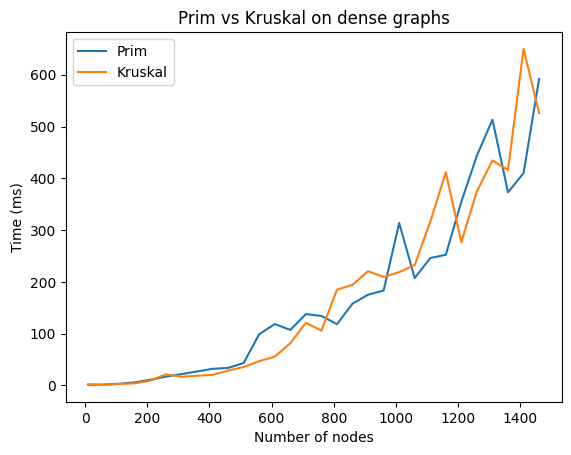

The program ran successfully after 0 errors.


In [7]:
program_has_run = False
error_count = 0

while not program_has_run:
    try:
        program_has_run = algs_dense_graph()
    except UnboundLocalError:
        error_count += 1
    except IndexError:
        error_count += 1

print("The program ran successfully after", error_count, "errors.")

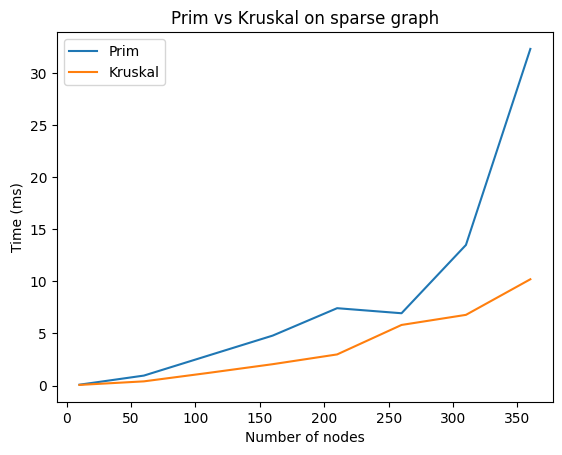

The program ran successfully after 211 errors.


In [8]:
program_has_run = False
error_count = 0

# The main function returns True if it runs successfully.
while not program_has_run:
    try:
        program_has_run = algs_sparse_graph()
    except UnboundLocalError:
        error_count += 1
    except IndexError:
        error_count += 1

print("The program ran successfully after", error_count, "errors.")